# MCMC

Markov Chain Monte Carlo methods allow you to **sample** from a distribution. They do not require you to analytically specify the normalized distribution. In order to use them
you just need to be able to evaluate the distribution to within a multiplicative constant at a given point.

* [Data Analysis Recipes: Using Markoc Chain Monte Carlo by Hogg and Foreman-Mackay](https://arxiv.org/pdf/1710.06068.pdf) was the source of the problems and a good general resource. (HFM)
* Chapter 29 in [Information Theory, Inference, and Learning Algorithms by David Mackay](http://www.inference.org.uk/itprnn/book.html) was also very useful.

## Imports etc...

In [4]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import emcee

import mcmc_helpers as h

# Problem 2 (1710.06068)

Build a simple Metropolis sampler and sample from a normal distribution

(array([0.00139907, 0.        , 0.00139907, 0.00373085, 0.00186543, 0.01212526, 0.01352433, 0.01632247, 0.02051968, 0.03590943, 0.03684214, 0.05176554, 0.09140583, 0.11472364, 0.13570967, 0.16322469, 0.17628267, 0.21405752, 0.2387744 , 0.25369781, 0.29520351, 0.25929408, 0.27421748, 0.26908756, 0.26862121, 0.25323145, 0.25229874, 0.22944728, 0.19120607, 0.16788825, 0.12358441, 0.11752178, 0.09093947, 0.05689546, 0.05829453, 0.03777486, 0.03964028, 0.01865425, 0.02471688, 0.01352433, 0.00559628, 0.0149234 , 0.01025984, 0.00373085, 0.00139907, 0.00093271, 0.        , 0.        , 0.        , 0.00139907]),
 array([-2.86015703, -2.64572869, -2.43130034, -2.216872  , -2.00244366, -1.78801532, -1.57358697, -1.35915863, -1.14473029, -0.93030194, -0.7158736 , -0.50144526, -0.28701691, -0.07258857,  0.14183977,  0.35626812,  0.57069646,  0.7851248 ,  0.99955314,  1.21398149,  1.42840983,  1.64283817,  1.85726652,  2.07169486,  2.2861232 ,  2.50055155,  2.71497989,  2.92940823,  3.14383658,  3.35

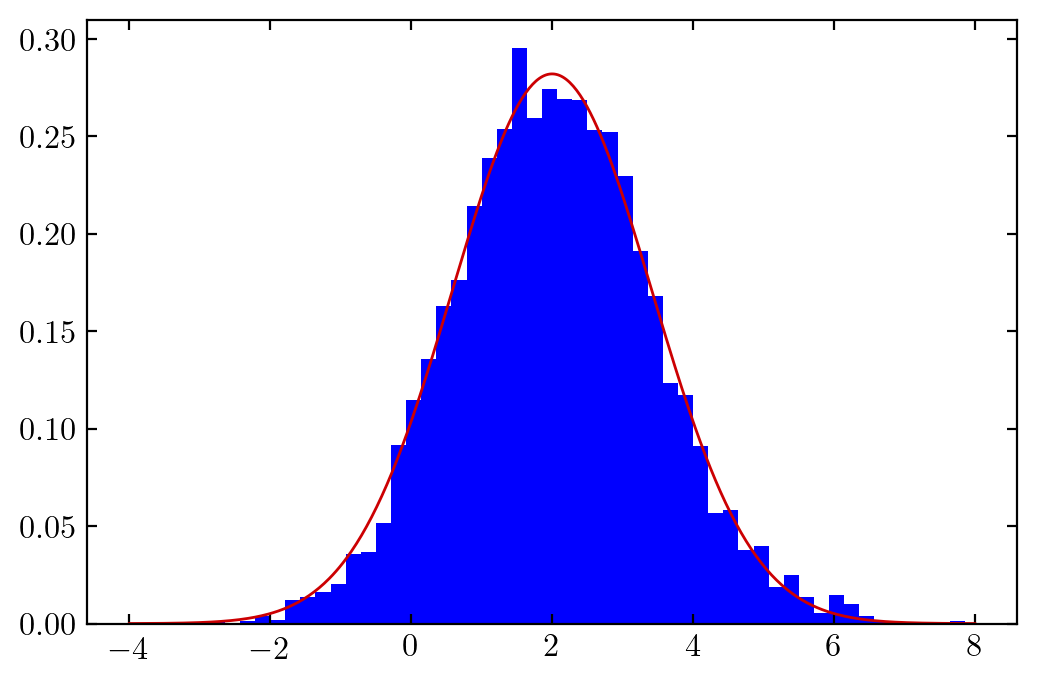

In [5]:
def func(x):
    res = norm.pdf(x, loc=2, scale=np.sqrt(2))
    return res

def get_next_x(x, f):
    potential_next_x = x + norm.rvs(loc=0, scale=1)
    to_move = uniform.rvs()
    if f(potential_next_x)/f(x) >  to_move:
        return potential_next_x
    else:
        return x

# Truth
test_x = np.linspace(-4, 8, num=500)
test_y = func(test_x)
plt.plot(test_x, test_y)

# Burn in
cur_x = 0.5
for i in range(1000):
    cur_x = get_next_x(cur_x, func)

# Run
seen_xes = []
for i in range(10000):
    seen_xes.append(cur_x)
    cur_x = get_next_x(cur_x, func)
    
plt.hist(seen_xes, bins=50, density=True)

# Problem 3 (1710.06068)

Same as above but for a uniform distribution on \[3, 7\]

(array([0.25753862, 0.25378806, 0.32379855, 0.26754012, 0.23253487, 0.21878281, 0.22753412, 0.25878881, 0.25503824, 0.25378806, 0.24128618, 0.27129068, 0.24753712, 0.25628843, 0.24628693, 0.27254087, 0.25878881, 0.24503674, 0.26253937, 0.26503974, 0.27129068, 0.25878881, 0.26628993, 0.24753712, 0.24628693, 0.21128168, 0.25253787, 0.22753412, 0.26628993, 0.25628843, 0.24753712, 0.24378656, 0.28629293, 0.25753862, 0.23253487, 0.23003449, 0.25878881, 0.23628543, 0.23628543, 0.27629143, 0.22878431, 0.26503974, 0.24253637, 0.25753862, 0.21503225, 0.23253487, 0.22128318, 0.24753712, 0.23753562, 0.22878431]),
 array([3.00008607, 3.08007407, 3.16006208, 3.24005008, 3.32003808, 3.40002609, 3.48001409, 3.56000209, 3.6399901 , 3.7199781 , 3.7999661 , 3.87995411, 3.95994211, 4.03993012, 4.11991812, 4.19990612, 4.27989413, 4.35988213, 4.43987013, 4.51985814, 4.59984614, 4.67983414, 4.75982215, 4.83981015, 4.91979816, 4.99978616, 5.07977416, 5.15976217, 5.23975017, 5.31973817, 5.39972618, 5.47971418

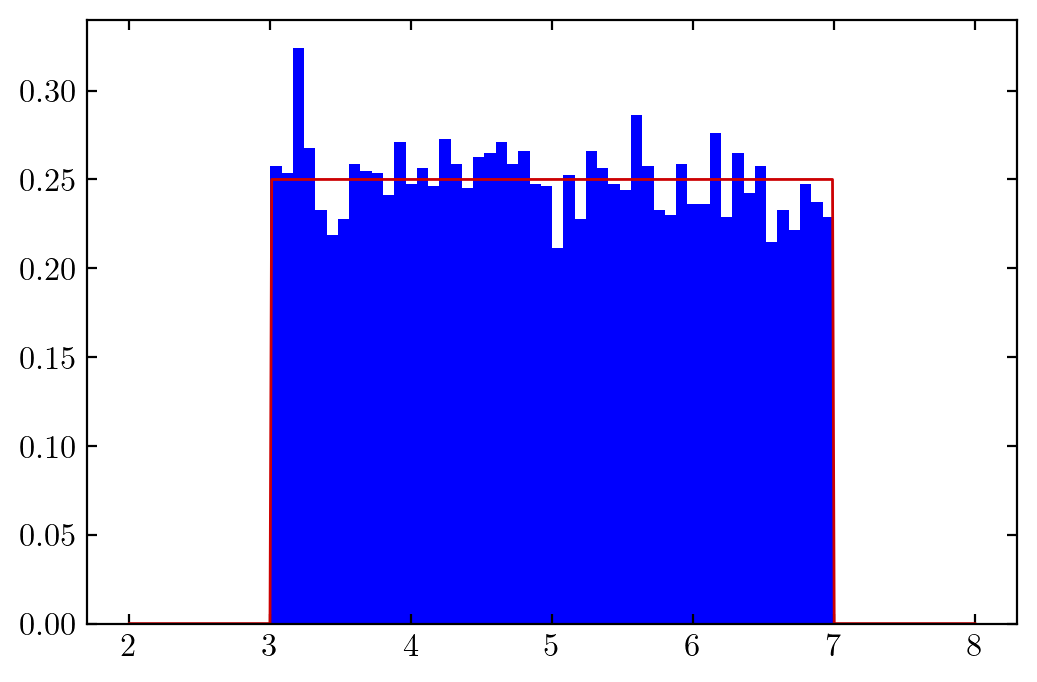

In [6]:
def func(x):
    if type(x) is np.ndarray:
        res = np.zeros_like(x) + 1
        res[x > 7] = 0
        res[x < 3] = 0
    else:
        res = 1 if 3 < x < 7 else 0
    return res

# This is exactly the same as above
def get_next_x(x, f):
    potential_next_x = x + norm.rvs(loc=0, scale=1)
    to_move = uniform.rvs()
    if f(potential_next_x)/f(x) > to_move:
        return potential_next_x
    else:
        return x

# Truth
test_x = np.linspace(2, 8, num=500)
test_y = func(test_x)

# Burn in
cur_x = 3.5
for i in range(1000):
    cur_x = get_next_x(cur_x, func)

# Run
seen_xes = []
for i in range(10000):
    seen_xes.append(cur_x)
    cur_x = get_next_x(cur_x, func)

# Note how the integral of this isn't 1. Because we normalize the hist we need to normalize this
plt.plot(test_x, test_y/4)
# Density=True enforces that the integral of the plot is 1
plt.hist(seen_xes, bins=50, density=True)

# Useful tools (to test/debug MCMC)

## Trace plots

Trace plots can show if your chain is wandering around the region you expect it to. Some failing examples:
* A long horizontal line: Getting stuck on a single value
* Different walkers permanently in different regions: Potentially multi modal space that they can't cross.

Text(0.1, 0.8, 'Burn in')

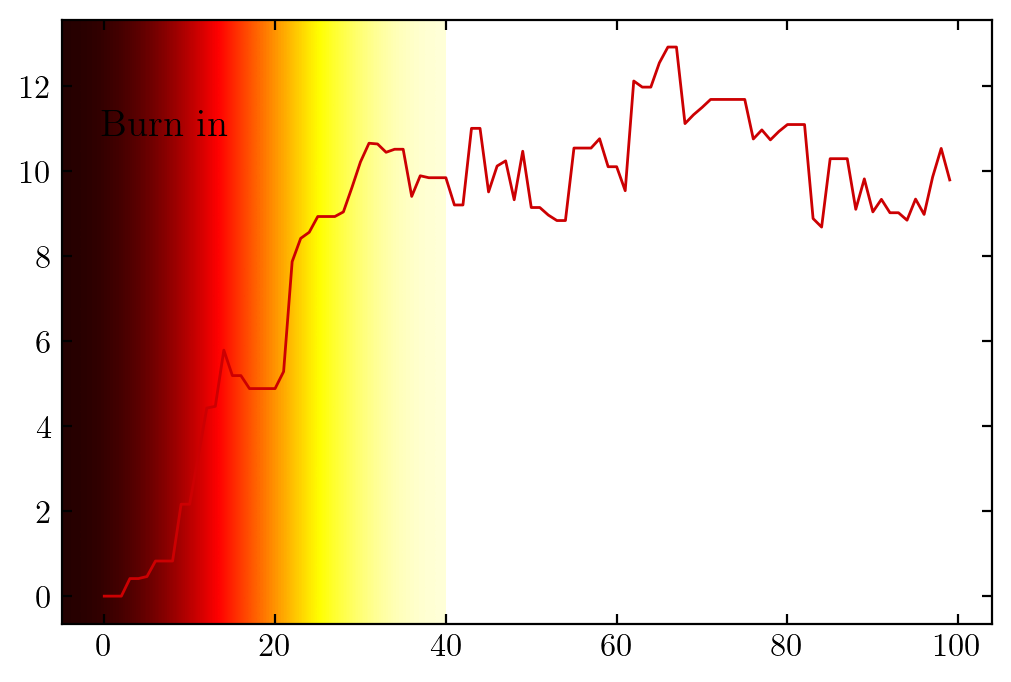

In [7]:
def func(x):
    return norm.pdf(x, loc=10)

proposal_pdf = norm()
cur_x = 0

seen_xes = []
for i in range(100):
    seen_xes.append(cur_x)
    cur_x = h.get_next_x(cur_x, func, proposal_pdf)
_, ax = plt.subplots()

ax.plot(seen_xes)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Show cool red/yellow on burn in.
ax.imshow([[0, 1], [0, 1]], interpolation='bicubic', cmap=plt.cm.hot, extent=(xmin, 40, ymin, ymax), alpha=1, aspect="auto")

ax.set(
    xlim=(xmin, xmax),
    ylim=(ymin, ymax),
)
ax.annotate("Burn in", (0.1, 0.8), xycoords="figure fraction")

# Why are we sampling like this?

It is pretty cool that we can sample from a function so simply, but why do we bother? Can't we just, I dunno, sample from it directly somehow?


There are not many functions that can be analytically sampled from. See below for a couple of examples.
But for our crazy/weird function, especially if it is high dimensional it is highly unlikely that we can find an analytical way to draw from it.
This means that we need to play some sort of game to sample from it.

Idea 1 uniform sampling - lets not play silly games and just uniform sample (e.g. if our domain is `[0, 10]` just take samples at `[0, 1, ..., 10]`). This should give us a good picture of what our function looks like? Two problems:
* First, we need to sample densely enough to get an accurate picture of our function and what is densely enough depends on our function...
* Second, this scales exponentially with the number of dimension - $n_{samples}^{D}$. So while this might work for a low D problem, you're going to be sampling incredibly sparesly in high D.

Idea 2 rejection sampling - sample from some f(x) that is > than our g(x) at every point. Then draw u from the uniform `[0, 1]` and if `g(x)/f(x) > u` keep it else try again.
* Works fine if f(x) is close to g(x)
* I don't follow the math fully here but again the number of rejections grows exponentially with the number of dimensions

Idea 3 importance sampling - forget sampling, often the reason we care about the sample of x's is to predict the expectation of some q(x). Draw samples from some f(x) that is not our true g(x),
then weight each of those samples as `w = g(x) / f(x)` (so that if x is over-represented (f(x) > g(x)) we downweigh it). Apply scale q(x) by w.
* Works fine if f(x) is close to g(x)
* If not, we will be slow to cover our space with good statsig. A low probability region in f(x) is unlikely to be drawn from but when it is, it will have a huge weight if this is a high prob region in g(x). We will have a small number of samples in this region contributing a large amount to the expectation value.


**Summary**

Sampling arbitrary distributions especially in high dimensions is **hard**. MCMC provides a relatively simple way to do this!
In order to use MCMC, all you need is to be able to evaluate your unnormalized PDF to compute the ratio at x and x'.

## Detour into analytically sampleable functions

### Uniform random [0, 1)

I'm not going to implement this because it is hard. The way you do it is to generate an x bit int (hopefully x is large). Then divide that int by 2^x.

To generate the x bits you can either use a hardware RNG e.g. [lava lamps](https://blog.cloudflare.com/lavarand-in-production-the-nitty-gritty-technical-details/), or more practically
something like the microseconds in seek times for a hard drive [see /dev/random/](http://man7.org/linux/man-pages/man4/random.4.html).

Most practically though, you can use a PRNG e.g. the Mersenne twister.

### Normal distribution

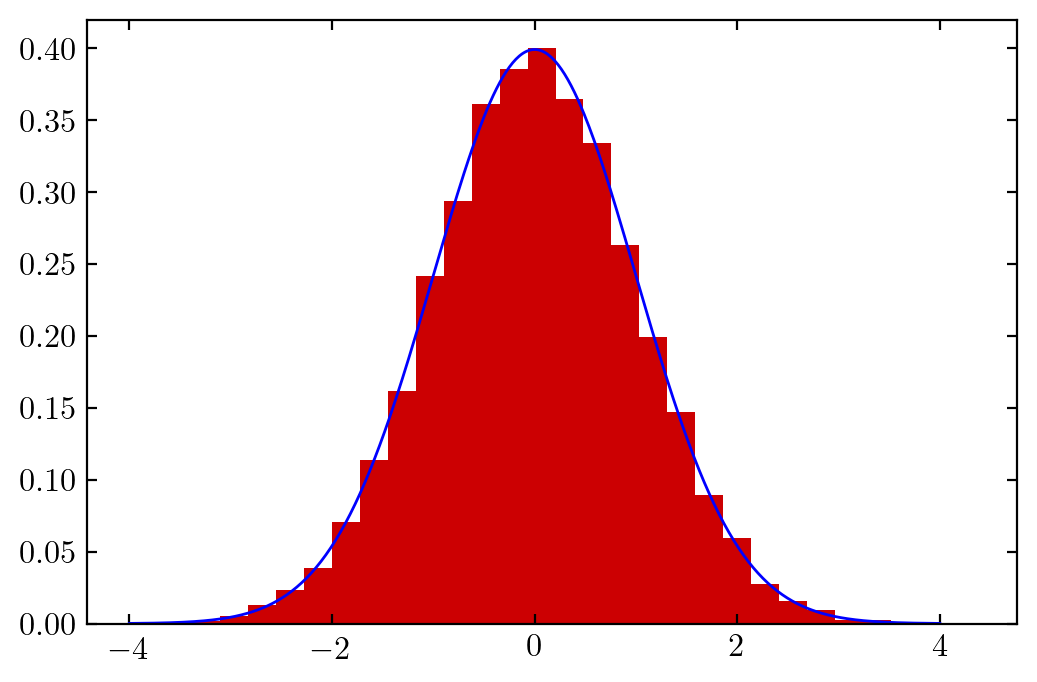

In [8]:
# Use the Box Muller algo: https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

def box_muller(u1, u2):
    n1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    n2 = np.sqrt(-2 * np.log(u2)) * np.cos(2 * np.pi * u1)
    return n1, n2


dist = []
for i in range(10000):
    u1, u2 = np.random.random(size = 2) # Using the uniform RNG we now know how to implement
    n1, n2 = box_muller(u1, u2)
    dist.extend([n1, n2])

plt.hist(dist, bins=30, density=True)

# Truth
test_x = np.linspace(-4, 4, num=500)
plt.plot(test_x, norm.pdf(test_x))

# And going from a normal dis with 0 mean, unit variance to any other normal is trivial.

# When do we have enough samples and what have we learned?

Whenever we are sampling, whether it be by analytical or MCMC methods it is important to know when we have enough information and can stop. Also, why have we been taking all these samples?

In the previous examples we knew that we had enough samples done because I overplotted the actual function and we could see that the sampler had accurately **enough for what I wanted to do** approximated that function. 
To put it another way, the sum over our discrete samples was an accurate enough approximation of the integral over the function.
in region \[x1, x2\] the `number of samples / total samples ~ integral of the normalized function`.

In reality we can't test this because we can't calculate the function across the entire parameter space (if we could we wouldn't need MCMC!) because:
* The parameter space is huge
* Evaulating the functions is incredibly slow
* Both of these

## Some Intuition


We can use our approximation of the function - the MCMC draws. If we find that e.g. the second half of the MCMC run results in the same distribution as the first half then we have probably converged to the function. It is unlikely, though not impossible, that both would be wrong in the same way.

The next cell shows an attempt to sample a secret function, carefully hidden in the helpers file.

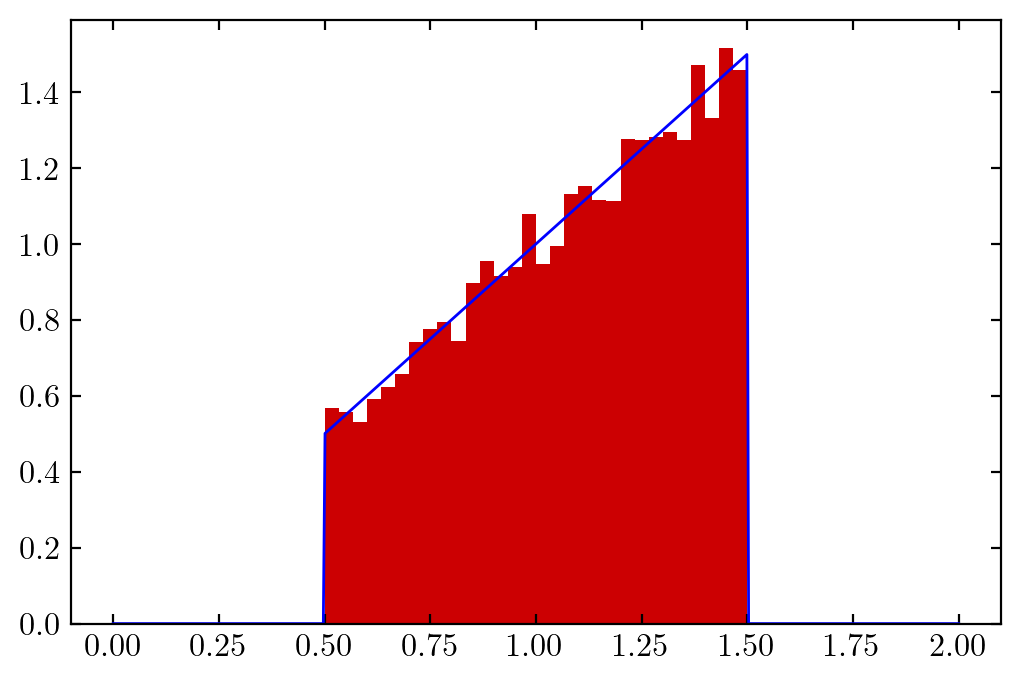

In [9]:
func = h.hidden_func

proposal_pdf = norm()
cur_x = 1

# Burn in
for i in range(1000):
    cur_x = h.get_next_x(cur_x, func, proposal_pdf)

# Lets say it is good enough if each half is within 10% of each other in 80% of cases
def is_good_enough(xes):
    split_pt = int(len(xes)/2)
    half1, half2 = xes[:split_pt], xes[split_pt:]
    
    hist1, _ = np.histogram(half1, bins=30)
    hist2, _ = np.histogram(half2, bins=30)
    
    success = np.logical_and(hist2 < hist1 * 1.1, hist2 > hist1 * 0.9)
    return (np.sum(success) / len(success) > 0.8)
    
# Eval
seen_xes = []

while True:
    for i in range(1000):
        cur_x = h.get_next_x(cur_x, func, proposal_pdf)
        seen_xes.append(cur_x)
    if is_good_enough(seen_xes):
        break
seen_xes = np.array(seen_xes)
plt.hist(seen_xes, bins=30, density=True)

test_x = np.linspace(0, 2, num=500)
plt.plot(test_x, h.hidden_func(test_x))

In [10]:
print("The expectation value for x under this sampling func: {:.4f}".format(np.mean(seen_xes)))
# integral x*p(x) = integral x^2 dx = x^3/3 over 0.5 to 1.5
print("Compare that to the analytical expectation: {:.4f}".format((1.5**3 - 0.5**3)/3))
print("Not bad...\n\n")

# Imagine now that we want to know the expectation of some function on that x
def f(x): return x*x

print("The expectation value for f(x) = x^2 is: {:.4f}".format(np.mean(f(seen_xes))))
# integral f(x) * p(x) dx == integral x^2 * x dx = x^4/4
print("Analytically: {:.4f}".format((1.5**4 - 0.5**4)/4))

print("Note that E(f(x)) == {:.4f} != {:.4f} == f(E(x))!".format(np.mean(f(seen_xes)), f(np.mean(seen_xes))))

# We can also presumably get some other stats (variance etc) of both of those too

The expectation value for x under this sampling func: 1.0828
Compare that to the analytical expectation: 1.0833
Not bad...


The expectation value for f(x) = x^2 is: 1.2487
Analytically: 1.2500
Note that E(f(x)) == 1.2487 != 1.1725 == f(E(x))!


## Proper ways

In [69]:
nwalkers, ndim, ll_fn = 10, 1, norm(0, 1).logpdf
p0 = np.random.random((nwalkers, 1)) * 100
sampler = emcee.EnsembleSampler(nwalkers, ndim, ll_fn)

pos = sampler.run_mcmc(p0, 1000, progress=True)

In [70]:
sampler.get_autocorr_time()

array([14.75440659])

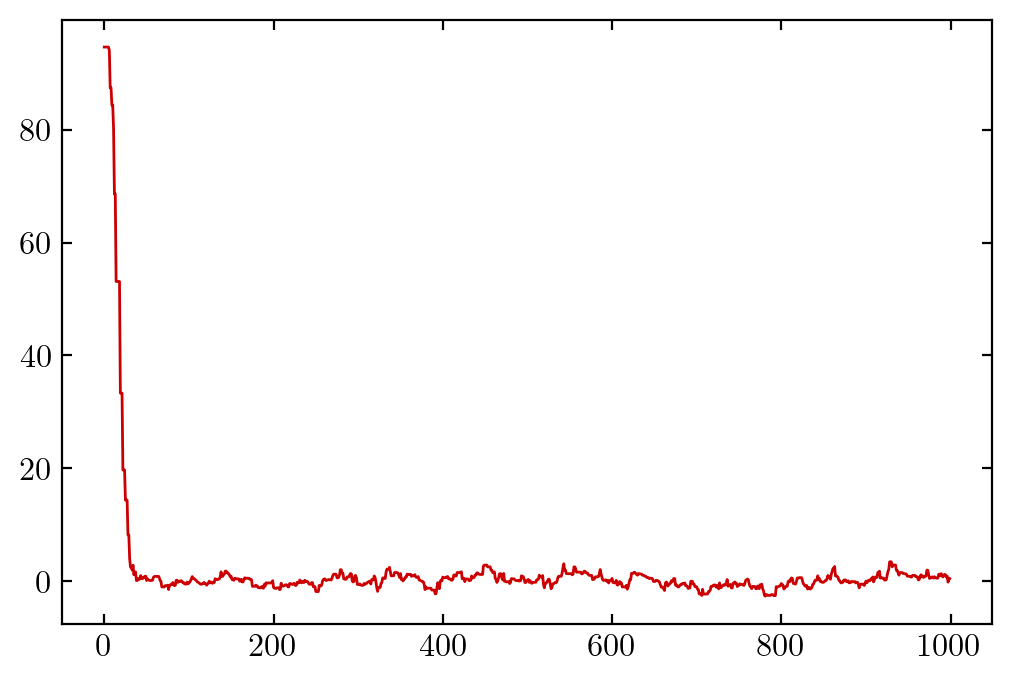

In [71]:
_, ax = plt.subplots()
ax.plot(sampler.chain[0].flatten())

# MCMC failure cases

We've shown why we need MCMC in order to be able to sample from funky functions. We've also shown that using this you can get the expectation value of those a draw from those functions. However, there are some cases where MCMC might fail to generate a good sample. I show one below.

The take away from this section is that MCMC can fail to correctly sample the space. And it is hard to know when this has happened. However I don't think that these cases are common.

(array([0.00081552, 0.        , 0.00040776, 0.0020388 , 0.01264056, 0.01875695, 0.04240703, 0.06361054, 0.10560981, 0.14760908, 0.2042877 , 0.26259736, 0.30745095, 0.37310029, 0.36616837, 0.38777964, 0.35964421, 0.37024597, 0.30459663, 0.24139385, 0.19083162, 0.12436676, 0.0762511 , 0.0517855 , 0.03425183, 0.01386384, 0.00652416, 0.00448536, 0.00122328, 0.00285432]),
 array([-3.72208079, -3.47683842, -3.23159604, -2.98635367, -2.7411113 , -2.49586892, -2.25062655, -2.00538417, -1.7601418 , -1.51489943, -1.26965705, -1.02441468, -0.77917231, -0.53392993, -0.28868756, -0.04344518,  0.20179719,  0.44703956,  0.69228194,  0.93752431,  1.18276668,  1.42800906,  1.67325143,  1.9184938 ,  2.16373618,  2.40897855,  2.65422093,  2.8994633 ,  3.14470567,  3.38994805,  3.63519042]),
 <a list of 30 Patch objects>)

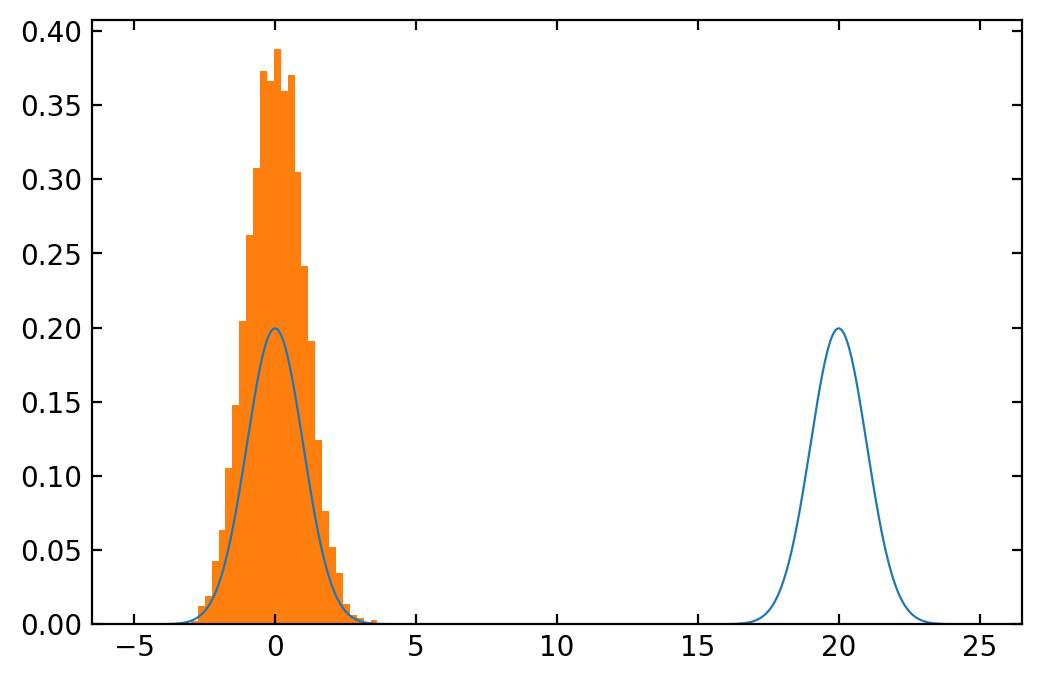

In [180]:
def func(x):
    return norm.pdf(x)/2 + norm.pdf(x, loc=20)/2

# Note that this would not fail if we used a proposal PDF that allowed us to jump from one region of high probability to another!
# However, this would lead to a lot of rejections as most large jumps would land in the empty region and fail.
# proposal_pdf = norm(scale = 30). 
proposal_pdf = norm()


cur_x = 0

seen_xes = []
for i in range(10000):
    seen_xes.append(cur_x)
    cur_x = h.get_next_x(cur_x, func, proposal_pdf)
    
test_x = np.linspace(-5, 25, num=1000)
plt.plot(test_x, func(test_x))
plt.hist(seen_xes, bins=30, density=True)

# Multiple walkers/chain

So far we have been running a single MCMC chain. However, in most cases you will run many chains. This is useful for a couple of reasons:

* Speed: Each chain is completely independent and so can be run on separate cores/nodes This reduces wall clock time for convergence (though increases CPU time because of the added burn ins)
* Tests initialization dependence: Each walker can (should?) be initialized at a different start location. If they don't converge (see the "when do we have enough samples" test) to the same distribution then you know that you haven't converged overall! Initializing walkers in different modes would catch that failure case, which we couldn't catch with a single walker.

# What MCMC isn't

We have said that MCMC is a sampler but it could also be, and often is, used for other things. It probably shouldn't be... (HFM 1)

* An optimizer
    * MCMC spends most of its time sampling near the maximum of the function it is given so it might sound like a good way to find the maximum.
    * But it is a very inefficient optimizer. It is designed to **sample**.
    * If you want an optimizer use an optimizer.
* A way to search parameter space
    * MCMC spends its time samping near the maximum of the function. It does not search parameter space!
    * E.g. if there is a region of parameters space where the function -> 0 MCMC is highly unlikely to ever go there! That space will not be explored.
    * If there is an important non-zero region far away, separated by a large zero regio (relative to the step size) MCMC will not find it!

# A concrete example

Given some data to fit to (y: the stellar mass function), a model (the universe machine), a parameter space (x: the 45ish inputs to the UM) with priors on those parameters.

For a given point x_i the model predicts some y' (the stellar mass function in the output of the UM with those inputs). 
Assuming we have some uncertainties on y' we can then calculate the likelihood of the observed data given this set of input parameters - L(y | x_i).
Using the priors we can get the unnormalized posterior probability `unnorm_posterior(x_i | y) = L(y | x_i) \* prior(x_i)`

We want to sample from this posterior function to learn what its shape is. From that we can get the expected value of `x` is, and also the range of possible values for it (the covariance).

Using the set of sampled `x`'s we can compute the set of SMFs and get the expected SMF by averaging those **N.B. remember we want to compute the expectation of f(x)) not f(E(x))**. Similarly we can get the variance on each point.

# Why are we sampling?

So far we've done a lot of how to sample, why we need to sample like this, when our sampling can go wrong and when we have enough samples. We've also seen what you shouldn't do with MCMC.

But what should you do once you have taken all these samples?

See [this talk by Michael Betancourt](https://youtu.be/DJ0c7Bm5Djk?t=4h40m9s) and compute the expectation of various things.

5.582559128801064
-0.3032982254301583


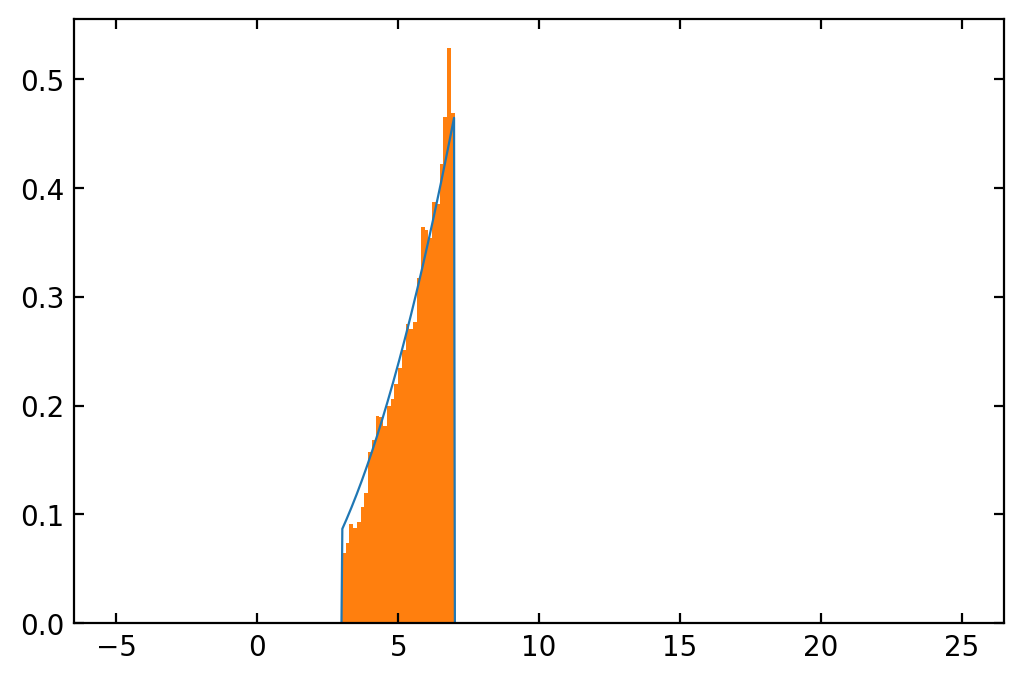

In [44]:
def func(x):
    if type(x) is np.ndarray:
        res = np.zeros_like(x)
        res[(x > 3) & (x < 7)] = np.power(x[(x > 3) & (x < 7)], 2)
        return res
    return x*x if 3 < x < 7 else 0

proposal_pdf = norm()

cur_x = 5
# Burn in
for i in range(100):
    cur_x = h.get_next_x(cur_x, func, proposal_pdf)

# Sample
seen_xes = []
for i in range(10000):
    seen_xes.append(cur_x)
    cur_x = h.get_next_x(cur_x, func, proposal_pdf)

seen_xes = np.array(seen_xes)
test_x = np.linspace(-5, 25, num=1000)
plt.plot(test_x, func(test_x)/105)
plt.hist(seen_xes, bins=30, density=True)

# Compute the expected (long run average) X value
print(np.mean(seen_xes))
# Compute the expected f(x) value - for any f
# E[f(x)] = integral f(x) p(x) dx = mean f(the samples)
# integral np.sin(x) * x^2 dx = 1/4 * x^4 from 3 to 7
# = 600 - 20 
print(np.mean(np.sin(seen_xes)))

# Note that neither of these are the integral under the func
# They are evaluations of expectation of 
# Integral x**2 = 1/3 * x**3 from 3 to 7 = 343/3 - 9 ~ 105

# Confusion with Monte Carlo Integration

I got briefly confused thinking that you can integrate with MCMC. No! MCMC is a sampler.

I think I was getting confused with [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) in which you sample points in your domain using uniform random sampling
and evaluate the function at those points. The integral is then the length/area/volume of the domain * sum(f(x)) / num points.

Another way to think of this is: get the average value of the function over the region and then multiply by the size of the region.

In [162]:
# e.g. to compute the area under the 1d normal distribution

def func(x):
    return norm.pdf(x)

# sample from -5 to 5
def sampler():
    return 10*(np.random.random() - 0.5)

num_points, s = 10000, 0
for i in range(num_points):
    x = sampler()
    s += func(x)
    
print(s/num_points * 10) # Should -> 1 as the num_points -> inf

1.0170393451777693
